In [70]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [71]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [72]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [73]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [74]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [75]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [76]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [77]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [78]:
X=df.drop(columns=['Exited'])
y=df["Exited"]


In [79]:
from sklearn.model_selection import train_test_split
X_trainf,X_test,y_trainf,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_trainf,y_trainf,test_size=0.2,random_state=42)

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [81]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_valid_scaled= scaler.transform(X_valid)

In [82]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [83]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential,layers,Input


In [84]:
model = Sequential([
    Input(shape=(11,)),
    layers.Dense(11,activation='sigmoid'),
    layers.Dense(11,activation='sigmoid'),
    layers.Dense(1,activation='sigmoid'),
])

In [85]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [86]:
model.compile(optimizer="Adam",loss="binary_crossentropy",metrics=['accuracy'])

In [87]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_data=(X_valid,y_valid))

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3066 - loss: 0.8064 - val_accuracy: 0.7956 - val_loss: 0.5936
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7913 - loss: 0.5688 - val_accuracy: 0.7956 - val_loss: 0.5254
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.5190 - val_accuracy: 0.7956 - val_loss: 0.5096
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7945 - loss: 0.5083 - val_accuracy: 0.7956 - val_loss: 0.5061
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8011 - loss: 0.4969 - val_accuracy: 0.7956 - val_loss: 0.5047
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7962 - loss: 0.5033 - val_accuracy: 0.7956 - val_loss: 0.5046
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7927 - loss: 0.5071 - val_accuracy: 0.7956 - val_loss: 0.5041
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7846 - loss: 0.5174 - val_accu

In [88]:
y_pred = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [89]:
y_pred[:5]

array([[0.20772651],
       [0.17902894],
       [0.23533548],
       [0.17108661],
       [0.20659138]], dtype=float32)

In [90]:

y_pred = (y_pred > 0.5).astype("int32")  # threshold at 0.5



In [91]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8035

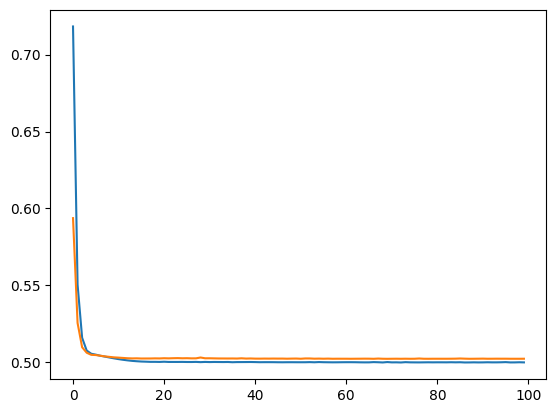

In [92]:


import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])



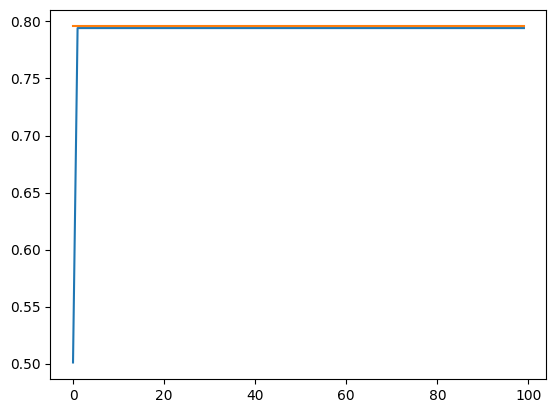

In [93]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])